## <font color="coral">Hi there!

This notebook is intended for anyone new to Pandas and particularly Matplotlib. We expect you've been introduced to coding, Python, and Jupyter Notebooks, but we'll teach you all of the plotting specific syntax that you need to know. Follow along with this Jupyter Notebook through each "cell" going from top to bottom.

Both Pandas and Matplotlib cover a multitude of use cases and this notebook would not be able cover them all. We will explore the most common cases for plotting and practical tips to get you started.
    
Expected time to complete the notebook is ~20 minutes, but could be longer or shorter depending on one's own pace. 
    
### A few other great resources for learning matplotlib:

- Nicholas P. Rougier's [Matplotlib Tutorial](https://github.com/rougier/matplotlib-tutorial)
    
- RealPython [Guide to Python plotting with Matplotlib](https://realpython.com/python-matplotlib-guide/)
    
- The Matplotlib [User's Guide](https://matplotlib.org/stable/users/index.html)

### How to use this notebook

Each cell can be "Run", meaning the code inside cell is executed, by clicking on the cell and hitting the "▶️" button towards the top of the page. You can also run each cell by hitting "Shift-Return/Enter" simoultaneously.

Try it! Run the cell below, and you should see a message printed underneath. (Try changing the message that is printed if you are interested.)

In [4]:
message = "Hello world!"
print(message)

Hello world!


## <font color="coral">Let's get started!

Each cell will either be text, code, or a combination of each. As a reminder, if you see a line that begins with the '#' character, this line is called a comment and purely meant to be informative, it does not affect the code. 

### So what's Matplotlib?

It's not an understatemetn to say that ["Matplotlib is probably the single most used Python package for 2D-graphics"](https://github.com/rougier/matplotlib-tutorial). Importantly, it provides ways to create both quick-and-dirty and publication-quality figures. 

First, we need to import Matplotlib. Specifically we will use the Pyplot submodule which provides a MATLAB-like interface for plotting. Create your first plot by running the cell below.

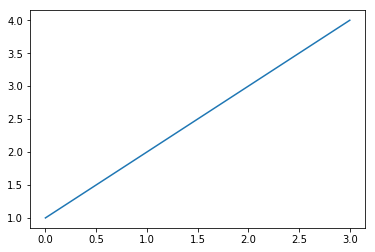

In [18]:
import matplotlib.pyplot as plt

# We can use plotting functions with plt.{function name}
plt.plot([1, 2, 3, 4])
plt.show()

Repeating calling Pyplot functions will generate a single plot by layering shapes over one another. The call to `plt.show()` tells Pyplot to display the layered figure.

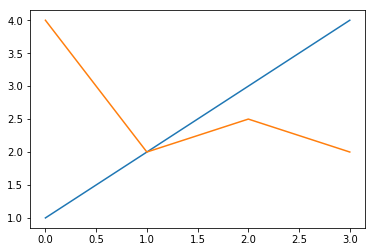

In [26]:
# Calling plt.plot twice will draw one line plot above the other
plt.plot([1, 2, 3, 4])
plt.plot([4, 2, 2.5, 2])
plt.show()

We can draw arbitary curves by passing to `plt.plot` both the x and y coordinates of the points to draw.

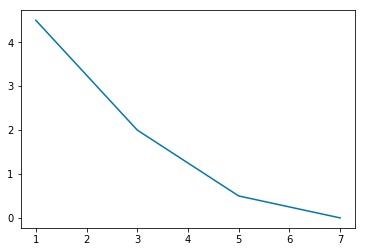

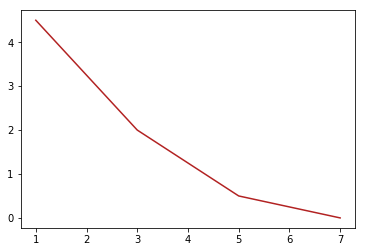

In [44]:
# `color=` lets us set the color using a hexidecimal color code
plt.plot([1, 3, 5, 7], [4.5, 2, 0.5, 0], color='#0077AA')
plt.show()

# or with a named color
plt.plot([1, 3, 5, 7], [4.5, 2, 0.5, 0], color='firebrick')
plt.show()

## <font color="coral"> Creating figures with Pandas DataFrames

Before we can start plotting, we'll need to load our data. We'll a dataset about volcanic events split into two comma separated  value (CSV) files: one that describes each volcano and the other with data about each volcanic event. Let's use the `read_csv` function from Pandas to load our dataset into two `DataFrame`s.

Typically we place all imports in the first cell of the notebook, but here we'll import "on demand" as we introduce extra libraries.

In [82]:
# typically we place all imports at the 
import pandas as pd

volcano_df = pd.read_csv('volcano_data/filtered_volc.csv')
events_df = pd.read_csv('volcano_data/filtered_events.csv')

After loading our data, we can remind ourselves the names and data types of each column using the `.info()` method.

In [84]:
volcano_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                958 non-null    int64  
 1   volcano_number            958 non-null    int64  
 2   volcano_name              958 non-null    object 
 3   primary_volcano_type      958 non-null    object 
 4   last_eruption_year        958 non-null    object 
 5   country                   958 non-null    object 
 6   region                    958 non-null    object 
 7   subregion                 958 non-null    object 
 8   latitude                  958 non-null    float64
 9   longitude                 958 non-null    float64
 10  elevation                 958 non-null    int64  
 11  tectonic_settings         958 non-null    object 
 12  evidence_category         958 non-null    object 
 13  major_rock_1              958 non-null    object 
 14  population

In [10]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19204 entries, 0 to 19203
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           19204 non-null  int64  
 1   volcano_number       19204 non-null  int64  
 2   volcano_name         19204 non-null  object 
 3   eruption_number      19204 non-null  int64  
 4   eruption_start_year  19204 non-null  int64  
 5   event_number         19204 non-null  int64  
 6   event_type           19204 non-null  object 
 7   event_remarks        2824 non-null   object 
 8   event_date_year      5328 non-null   float64
 9   event_date_month     4938 non-null   float64
 10  event_date_day       4245 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.6+ MB


### Box Plot of Volcano Elevation by Region

Suppose we want to understand how the distribution of volcano elevation changes between geographic regions. This is the perfect use case for a box plot!

First, let's start off by creating a single box plot for the entire dataset.

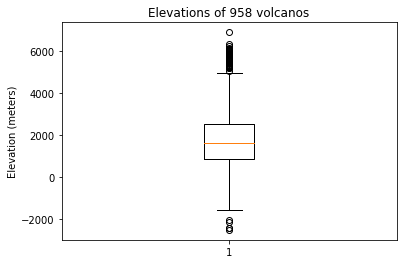

In [98]:
# Instead of a list, we can pass in a column from a Pandas DataFrame to Pyplot directly!
plt.boxplot(volcano_df['elevation'])

# We set axis labels with plt.ylabel and plt.xlabel
plt.ylabel('Elevation (meters)')

# We set the title with plt.title
plt.title(f'Elevations of {len(volcano_df)} volcanos')

plt.show()

We can use `.describe()` from Pandas to quickly get common statistics.

In [99]:
volcano_df['elevation'].describe()

count     958.000000
mean     1867.027140
std      1401.545901
min     -2500.000000
25%       881.000000
50%      1622.500000
75%      2548.250000
max      6879.000000
Name: elevation, dtype: float64

So what's going on with the negative elevation volcanoes? Filter the data frame to only include those with negative elevation and inspect the first few rows using `.head()` from Pandas.

In [93]:
volcano_df[volcano_df['elevation'] < 0].head()

,Unnamed: 0,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
13,13,284141,Ahyi,Submarine,2014,United States,"Japan, Taiwan, Marianas","Izu, Volcano, and Mariana Islands",20.42,145.03,-75,Subduction zone / Crustal thickness unknown,Eruption Dated,Andesite / Basaltic Andesite,0,0,0,0
83,83,331021,Axial Seamount,Submarine,2015,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (northern),45.95,-130.00,-1410,Rift zone / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,0,0,0,0
153,153,211070,Campi Flegrei del Mar di Sicilia,Submarine,1867,Italy,Mediterranean and Western Asia,Italy,37.10,12.70,-8,Rift zone / Continental crust (>25 km),Eruption Observed,Trachybasalt / Tephrite Basanite,230578,230578,230578,633350
186,186,331030,Cleft Segment,Submarine,1986,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (northern),44.83,-130.30,-2140,Rift zone / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,0,0,0,0
188,188,331020,CoAxial Segment,Submarine,1993,Undersea Features,Hawaii and Pacific Ocean,Pacific Ocean (northern),46.52,-129.58,-2400,Rift zone / Oceanic crust (< 15 km),Eruption Observed,Basalt / Picro-Basalt,0,0,0,0


Our dataset includes submarine volcanoes! This is a great example of how creating quick visualizations can help uncover otherwise hard-to-spot details in our dataset by pointing us in the right direction.

Now let's move on to creating a separate boxplot for each region. Before plotting, we should check how many unique regions there are.

In [46]:
volcano_df.region.unique()

array(['Japan, Taiwan, Marianas', 'South America',
       'México and Central America', 'Mediterranean and Western Asia',
       'Canada and Western USA', 'Africa and Red Sea', 'Atlantic Ocean',
       'Indonesia', 'Kamchatka and Mainland Asia', 'Alaska',
       'Kuril Islands', 'Melanesia and Australia',
       'Philippines and SE Asia', 'Middle East and Indian Ocean',
       'Antarctica', 'Iceland and Arctic Ocean', 'New Zealand to Fiji',
       'Hawaii and Pacific Ocean', 'West Indies'], dtype=object)

14 regions might be too many to fit on a single plot. Let's filter our data to only include volcanos in Alaska, Canada and the Western US, and Hawaii and the Pacific.

In [86]:
selected_df = volcano_df[
    volcano_df['region'].isin(['Alaska', 'Canada and Western USA', 'Hawaii and Pacific Ocean'])
]
selected_df.head()

,Unnamed: 0,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
4,4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,0,70,4019,393303
21,21,311320,Akutan,Stratovolcano,1992,United States,Alaska,Aleutian Islands,54.134,-165.986,1303,Subduction zone / Intermediate crust (15-25 km),Eruption Observed,Basalt / Picro-Basalt,0,24,233,4361
28,28,320020,Alligator Lake,Volcanic field,Unknown,Canada,Canada and Western USA,Canada,60.420,-135.420,2217,Intraplate / Continental crust (>25 km),Evidence Credible,Basalt / Picro-Basalt,0,0,47,20636
33,33,311390,Amak,Stratovolcano,1796,United States,Alaska,Aleutian Islands,55.424,-163.149,488,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,0,0,0,1345
42,42,311190,Amukta,Stratovolcano,1997,United States,Alaska,Aleutian Islands,52.500,-171.252,1066,Subduction zone / Intermediate crust (15-25 km),Eruption Observed,Andesite / Basaltic Andesite,0,0,0,0


Without visualizing, we can use Pandas to estimate the distribution of elevation by region. `.describe()` works on data frames grouped by one or more columns too!

In [100]:
selected_df.groupby('region')['elevation'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Alaska,38.0,1453.026316,914.205001,50.0,991.00,1324.0,1848.75,4278.0
Canada and Western USA,60.0,2302.033333,864.976025,-40.0,1722.75,2308.0,2798.25,4392.0
Hawaii and Pacific Ocean,11.0,204.090909,2837.070301,-2500.0,-2270.00,-1410.0,2789.00,4205.0


- OOP vs plt API
- Box plots
- Correlation between columns in dataframe (scatter + line fit)
- Subplots?

- Seaborn? / other aesthetic options